In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
ts = pd.read_csv("/content/airline-passengers.csv", 
                 index_col=0, squeeze=True, parse_dates=True)

In [ ]:
train, test = train_test_split(ts, test_size=0.3, shuffle=False)

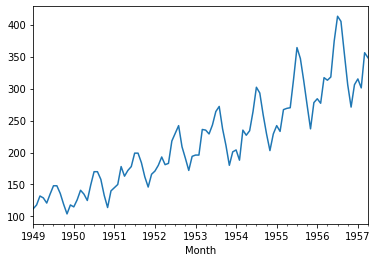

In [ ]:
train.plot()

In [ ]:
df = pd.DataFrame()
nlags=3
for i in range(nlags):
  df[f't-{i}'] = train.shift(i)

df = df.dropna(axis=0)

In [ ]:
y = df['t-0']
X = df[['t-1', 't-2']]

In [ ]:
from pandas.plotting import autocorrelation_plot

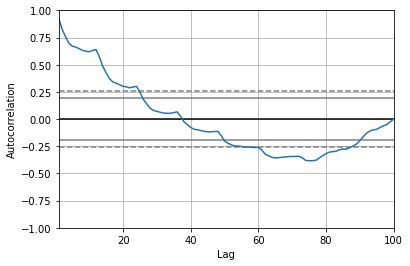

In [ ]:
autocorrelation_plot(train)

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [9]:
y = np.random.normal(0, 3, 1000)

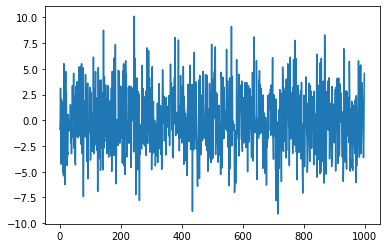

In [10]:
plt.plot(y)
plt.savefig("whiteboise.png")

In [ ]:
e = np.random.choice([-1, 1])
print(e)

1


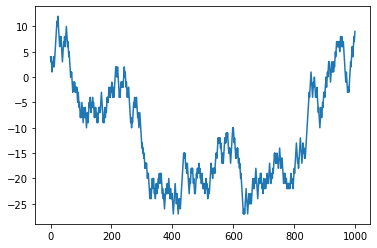

In [ ]:
ts2 = [] 
y =5 
for i in range(1000):
   x = np.random.choice([-1,1])
   y = y + x 
   ts2.append(y)
ts2 = np.array(ts2)
plt.plot(ts2)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
t = np.arange(len(train))
y = train.values

In [ ]:
model = LinearRegression()
model.fit(t.reshape(-1, 1), y)

LinearRegression()

In [ ]:
model.coef_

array([2.33447345])

In [ ]:
model.intercept_

102.80356435643563

In [ ]:
trend = model.predict(t.reshape(-1, 1)) # trend = model.coef_[0] * t + model.intercept_

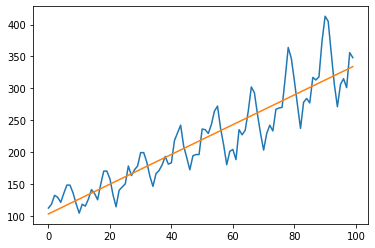

In [ ]:
plt.plot(train.values)
plt.plot(trend)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(degree=2)
t2 = poly.fit_transform(t.reshape(-1, 1))


In [ ]:
model = LinearRegression()
model.fit(t2, y)

LinearRegression()

In [ ]:
trend = model.predict(t2) # trend = model.coef[0] * t2[1] + model.coef[1] * t2[2] + model.intercept_ 

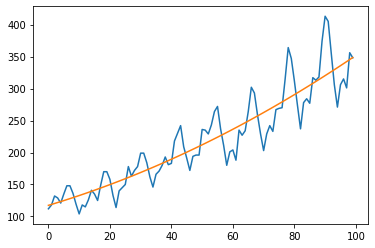

In [ ]:
plt.plot(train.values)
plt.plot(trend)

In [ ]:
z = train.values - trend

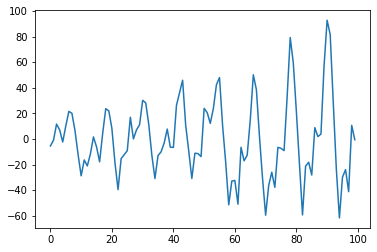

In [ ]:
plt.plot(z)

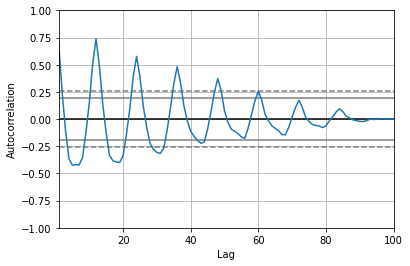

In [ ]:
autocorrelation_plot(z)

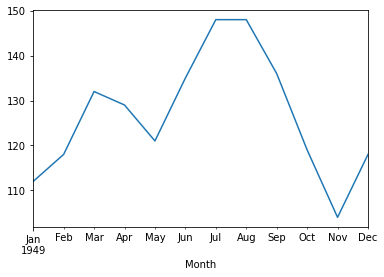

In [ ]:
train[:12].plot()

In [ ]:
t = np.arange(0, 12)
poly = PolynomialFeatures(degree=10)
t10 = poly.fit_transform(t.reshape(-1, 1))
model = LinearRegression()
model.fit(t.reshape(-1, 1), train[0:12])

LinearRegression()

In [ ]:
t = []
for i in range(100):
  t.append(i%12)
t = np.array(t)

In [ ]:
seasonality = model.predict(poly.transform(t.reshape(-1, 1)))

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
decompose = seasonal_decompose(train)

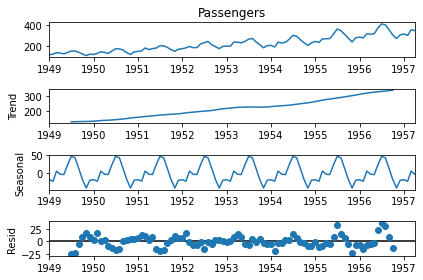

In [ ]:
decompose.plot()
plt.show()

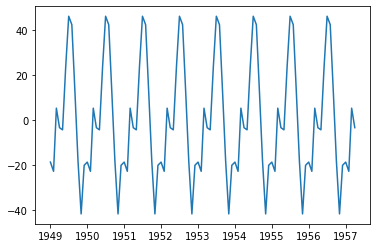

In [ ]:
plt.plot(decompose.seasonal)

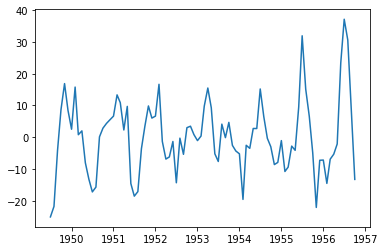

In [ ]:
plt.plot(decompose.resid)